In [1]:
!pip install datasets -q

In [134]:
import ast

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import *

from datasets import load_dataset

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = load_dataset("BAAI/TACO")

/opt/conda/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for BAAI/TACO contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/BAAI/TACO
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/25443 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [34]:
sample = next(iter(dataset['train']))

In [35]:
print(f'Keys: {list(sample.keys())}')
print(f"Count of Keys: {len(sample.keys())}")

Keys: ['question', 'solutions', 'starter_code', 'input_output', 'difficulty', 'raw_tags', 'name', 'source', 'tags', 'skill_types', 'url', 'Expected Auxiliary Space', 'time_limit', 'date', 'picture_num', 'memory_limit', 'Expected Time Complexity']
Count of Keys: 17


In [36]:
print(sample['question'])

This is an interactive problem.

In good old times dwarves tried to develop extrasensory abilities:

  * Exactly n dwarves entered completely dark cave. 
  * Each dwarf received a hat — white or black. While in cave, none of the dwarves was able to see either his own hat or hats of other Dwarves. 
  * Dwarves went out of the cave to the meadow and sat at an arbitrary place one after the other. When a dwarf leaves the cave, he sees the colors of all hats of all dwarves that are seating on the meadow (i.e. left the cave before him). However, he is not able to see the color of his own hat and none of the dwarves can give him this information. 
  * The task for dwarves was to got diverged into two parts — one with dwarves with white hats and one with black hats. 



After many centuries, dwarves finally managed to select the right place on the meadow without error. Will you be able to repeat their success?

You are asked to successively name n different integer points on the plane. After n

In [38]:
sample['solutions']

'[]'

In [103]:
trainData.head(4)

,question,solutions,starter_code,input_output,difficulty,raw_tags,name,source,tags,skill_types,url,Expected Auxiliary Space,time_limit,date,picture_num,memory_limit,Expected Time Complexity,count_solutions
0,This is an interactive problem.\n\nIn good old...,[],,"{""inputs"": [""hack\n30\n1 0 1 1 1 1 1 1 1 1 1 1...",HARD,"['interactive', 'binary search', 'geometry', '...",None,codeforces,"['Geometry', 'Sorting', 'Constructive algorith...",['Sorting'],https://codeforces.com/problemset/problem/1063/C,None,2.0 seconds,None,None,256.0 megabytes,None,True
1,There are $n$ candy boxes in front of Tania. T...,"[""INF = 10000000000.0\nmax_n = 50\nmax_k = 200...",,"{""inputs"": [""5 3 10\n1 2 3 4 5\nRGBRR\n"", ""2 1...",HARD,['dp'],None,codeforces,['Dynamic programming'],['Dynamic programming'],https://codeforces.com/problemset/problem/1057/C,None,None,2019-12-31,None,None,None,True
2,Little Petya likes to play a lot. Most of all ...,[],,"{""inputs"": [""10 10\n5 1 2 4 1 7 3 8 10 8\n0 5 ...",VERY_HARD,"['data structures', 'dsu']",None,codeforces,"['Spanning trees', 'Data structures']",['Data structures'],https://codeforces.com/problemset/problem/13/E,None,1.0 seconds,None,None,64.0 megabytes,None,True
3,"If you visit Aizu Akabeko shrine, you will fin...","[""def sub(maxs, mins):\n\tfor i in range(len(m...",,"{""inputs"": [""9714431"", ""16612328"", ""23422731"",...",UNKNOWN_DIFFICULTY,[],None,aizu,[],[],None,None,1.0 seconds,None,None,268.435456 megabytes,None,True


In [47]:
trainData = dataset['train'].to_pandas()
testData = dataset['test'].to_pandas()

In [132]:
type(trainData['solutions'][0]), type(testData['solutions'][0])

str

In [143]:
trainData['solutions'] = trainData['solutions'].apply(lambda x: ast.literal_eval(x))
testData['solutions'] = testData['solutions'].apply(lambda x: ast.literal_eval(x))

In [146]:
type(trainData['solutions'][0]), type(testData['solutions'][0])

(list, list)

In [ ]:
sns.displot(trainData['difficulty'])
plt.xticks(rotation=60)
plt.show()

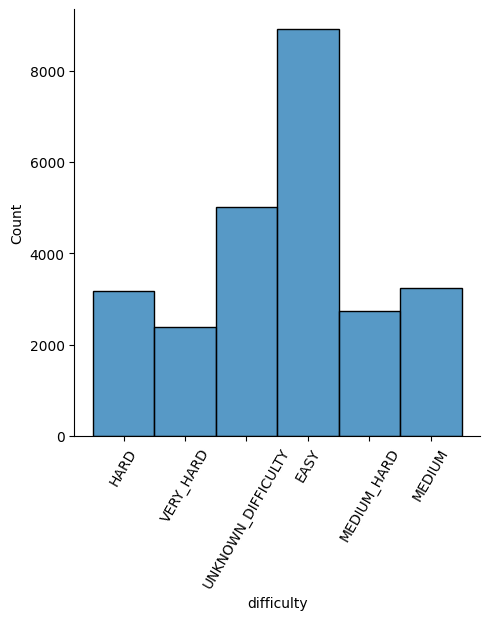

In [105]:
sns.displot(trainData['difficulty'])
plt.xticks(rotation=60)
plt.show()

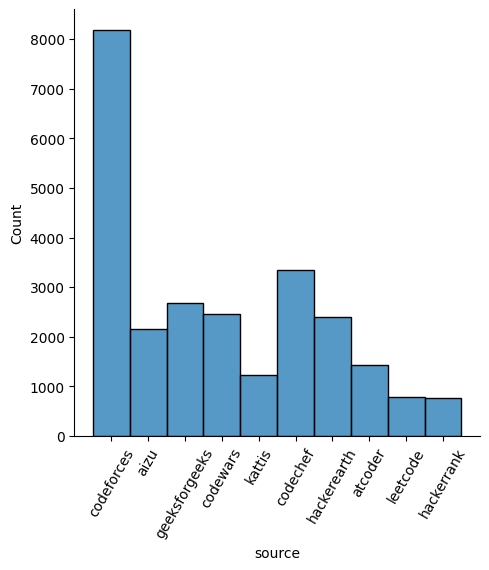

In [106]:
sns.displot(trainData['source'])
plt.xticks(rotation=60)
plt.show()

In [51]:
sample = trainData.sample(10)
len(sample)

10

In [52]:
def preprocess(df):
    df = df[['question', 'solutions']]
    return df

In [54]:
preprocess(sample)

,question,solutions,starter_code,input_output,difficulty,raw_tags,name,source,tags,skill_types,url,Expected Auxiliary Space,time_limit,date,picture_num,memory_limit,Expected Time Complexity
17503,"Tim is an absolutely obsessive soda drinker, h...",[],,"{""inputs"": [""9 0 3\n"", ""5 5 2\n""], ""outputs"": ...",EASY,"['maths', 'implementation']",None,kattis,"['Mathematics', 'Implementation']",[],https://open.kattis.com/problems/sodaslurper,None,None,None,None,None,None
11601,In this task you have to code process planner....,"[""def processes(start, end, processes):\n\tq =...","def processes(start, end, processes):\n\t","{""fn_name"": ""processes"", ""inputs"": [[""a"", ""c"",...",EASY,['Algorithms'],None,codewars,[],[],https://www.codewars.com/kata/542ea700734f7daf...,None,None,None,None,None,None
14222,"Two deer, AtCoDeer and TopCoDeer, are playing ...","[""[a, b] = input().split()\nif a == b:\n\tprin...",,"{""inputs"": [""H H\n"", ""D H\n"", ""D D\n"", ""H I"", ...",EASY,[],AtCoder Beginner Contest 056 - HonestOrDishonest,atcoder,[],[],https://atcoder.jp/contests/abc056/tasks/abc056_a,None,2.0 seconds,None,None,256.0 megabytes,None
18074,You are given N integers. The i-th integer is ...,"[""M = 998244353\n(N, *A) = open(0)\nd = [0] * ...",,"{""inputs"": [""4\n1\n1\n0\n2"", ""6\n1\n3\n0\n3\n5...",UNKNOWN_DIFFICULTY,[],Tenka1 Programmer Contest 2019 - Three Colors,atcoder,[],[],None,None,3.0 seconds,None,None,1024.0 megabytes,None
13382,Aizu is famous for its buckwheat. There are ma...,"[""while 1:\n\ttry:\n\t\tinp = int(input())\n\t...",,"{""inputs"": [""500\n1000\n0"", ""500\n0000\n0"", ""5...",UNKNOWN_DIFFICULTY,[],None,aizu,[],[],None,None,1.0 seconds,None,None,134.217728 megabytes,None
5821,ARE U A MATHEMATICAL PRODIGY OR A BIG INT USER...,[],,"{""inputs"": [], ""outputs"": []}",UNKNOWN_DIFFICULTY,[],frustrated,hackerearth,[],[],None,None,None,None,None,None,None
10975,People do many crazy things to stand out in a ...,"[""(n, k) = map(int, input().split(' '))\na = [...",,"{""inputs"": [""4 1\n"", ""5 3\n"", ""1 1\n"", ""2 1\n""...",EASY,"['implementation', 'constructive algorithms']",None,codeforces,"['Implementation', 'Constructive algorithms']",[],https://codeforces.com/problemset/problem/625/C,None,None,2019-12-31,None,None,None
12540,"In LeetCode Store, there are some kinds of ite...","[""class Solution:\n\n\tdef shoppingOffers(self...","class Solution:\n def shoppingOffers(self, ...","{""inputs"": [], ""outputs"": []}",MEDIUM_HARD,"['Bitmask', 'Memoization', 'Array', 'Backtrack...",None,leetcode,"['Dynamic programming', 'Bit manipulation', 'D...","['Dynamic programming', 'Bit manipulation', 'D...",https://leetcode.com/problems/shopping-offers/,None,None,None,None,None,None
20268,Given that \n```\nf0 = '0'\nf1 = '01'\nf2 = '0...,"[""def solve(n):\n\t(a, b) = '01'\n\tfor _ in r...",def solve(n):\n\t,"{""fn_name"": ""solve"", ""inputs"": [[0], [1], [2],...",EASY,['Algorithms'],None,codewars,[],[],https://www.codewars.com/kata/5aa39ba75084d7cf...,None,None,None,None,None,None
14933,This is the hard version of this problem. In t...,"[""import sys\n\ndef read(f):\n\t(n, x, y) = ma...",,"{""inputs"": [""6\n5 8 9\n01001\n00101\n6 2 11\n0...",HARD,"['greedy', 'dp']",None,codeforces,"['Dynamic programming', 'Greedy algorithms']","['Dynamic programming', 'Greedy algorithms']",https://codeforces.com/problemset/problem/1733/D2,None,3 seconds,2022-09-19,0,512 megabytes,None
